### CONSTANTS

In [2]:
MODEL_PATH = "models/xgboost.pickle.dat"
X_TEST_PATH = "data/X_test.csv"
Y_TEST_PATH = "data/y_test.csv"

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

### Reading Data and Model

In [4]:
X_test = pd.read_csv(X_TEST_PATH)
y_test = pd.read_csv(Y_TEST_PATH)
model = pickle.load(open(MODEL_PATH, "rb"))

### Visualizing Failure Predicted proba

In this section I will visualize our models confidence in prediction for two goals:

    1 - See if model predicts True positive confidently
    
    2 - See if the False negative has high propability but less than 0.5

In [5]:
data = pd.concat([X_test, y_test], axis=1)
failure_data = data[data['Target']==1]
X = failure_data.drop(columns='Target')
y_true = failure_data['Target']
y_pred_proba = model.predict_proba(X)[:,1]

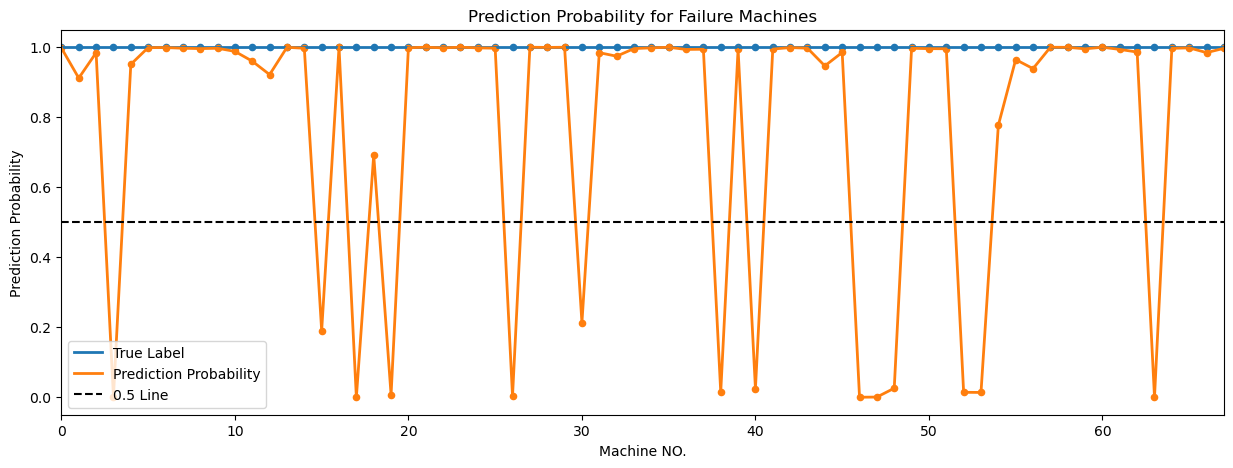

In [6]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(x=np.arange(len(y_true)), y=y_true, s=20)
plt.plot(np.arange(len(y_true)), y_true, linewidth=2, label="True Label")
plt.scatter(x=np.arange(len(y_pred_proba)), y=y_pred_proba, s=20)
plt.plot(np.arange(len(y_pred_proba)), y_pred_proba, linewidth=2, label="Prediction Probability")
plt.plot(np.arange(len(y_true)), 0.5*np.ones(len(y_true)), linestyle='dashed', c='black', label="0.5 Line")
plt.xlim([0, len(y_true)-1])
plt.title('Prediction Probability for Failure Machines')
plt.xlabel('Machine NO.')
plt.ylabel('Prediction Probability')
plt.legend()